In [2]:
# !pip install selenium

In [12]:
import requests
import urllib.request
from tqdm.notebook import tqdm
import six
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [126]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import pandas as pd
import time
from bs4 import BeautifulSoup
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
import time

In [5]:
# option = webdriver.ChromeOptions()
# option.add_argument("--disable-infobars") 
# browser = webdriver.Chrome('C:\webdr\chromedriver.exe',chrome_options=option)
# # 'https://xn--90adear.xn--p1ai/check/auto' –  ГИБДД.РФ
# browser.get('https://www.cian.ru/sale/flat/280361768/')
# pageSource2 = browser.execute_script("return document.documentElement.outerHTML;")
# soup = BeautifulSoup(pageSource2, 'html.parser')
# soup.prettify()

In [6]:
# pageSource2 = browser.execute_script("return document.documentElement.outerHTML;")
# soup = BeautifulSoup(pageSource2, 'html.parser')
# soup.prettify()

In [63]:
# i = 1
# while i < 100:
#     name = soup.find_all('p', 'a10a3f92e9--color_black_100--kPHhJ a10a3f92e9--lineHeight_22px--bnKK9 a10a3f92e9--fontWeight_normal--P9Ylg a10a3f92e9--fontSize_16px--RB9YW a10a3f92e9--display_block--pDAEx a10a3f92e9--text--g9xAG a10a3f92e9--text_letterSpacing__normal--xbqP6')[i].contents[0]
#     if name == 'Дизайнерский' or name == 'Без ремонта' or name == 'Косметический' or name =='Евроремонт':
#         print(name)
#         break
#     i += 1

    

Без ремонта


In [6]:
import torchvision
from torchvision.models import efficientnet_b3, EfficientNet_B3_Weights
model = efficientnet_b3(weights=EfficientNet_B3_Weights.IMAGENET1K_V1)
transforms = EfficientNet_B3_Weights.IMAGENET1K_V1.transforms()
transforms

ImageClassification(
    crop_size=[300]
    resize_size=[320]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BICUBIC
)

In [229]:
def get_first_image_link(article):
    try:
        img_link = article.find('li', '_93444fe79c--container--Havpv').img['src']
    except:
        img_link = ''
    return img_link

def get_other_images_links(browser):
    statist_code = BeautifulSoup(browser.execute_script("return document.documentElement.outerHTML;"), 'html.parser')
    images_list = []
    try:
        imag_html = statist_code.find('div', 'a10a3f92e9--thumbs-wrapper--pxYPN')
        for li in imag_html.find_all('li'):
            images_list += [li.a.img['src']]
        return images_list[:-1]
    except:
        return images_list

def get_article_link(article):
    try:
        art_link = article.find('a', '_93444fe79c--link--eoxce')['href']
    except:
        art_link = ''
    return art_link

def get_repair_type(html_art_code):
    art_code = BeautifulSoup(browser.execute_script("return document.documentElement.outerHTML;"), 'html.parser')
    repair_type = ''
    
    try:
        i = 1
        repair_type = ''
        while i < 100:
            name = art_code.find_all('p', 'a10a3f92e9--color_black_100--kPHhJ a10a3f92e9--lineHeight_22px--bnKK9 a10a3f92e9--fontWeight_normal--P9Ylg a10a3f92e9--fontSize_16px--RB9YW a10a3f92e9--display_block--pDAEx a10a3f92e9--text--g9xAG a10a3f92e9--text_letterSpacing__normal--xbqP6')[i].contents[0]
            if name == 'Дизайнерский' or name == 'Без ремонта' or name == 'Косметический' or name =='Евроремонт':
                repair_type = name
                break
            i += 1
    except:
        repair_type = ''
        
    if repair_type == '':
        try:
            while j < 100:
                name = art_code.find_all('li', 'a10a3f92e9--item--d9uzC')[j].find('span', 'a10a3f92e9--value--Y34zN').contents[0]
                if name == 'Дизайнерский' or name == 'Без ремонта' or name == 'Косметический' or name =='Евроремонт':
                    repair_type = name
                    break
                j += 1
        except:
            repair_type = ''
    return repair_type

def get_view_nums(html_code):
    try:
        all_view_num = html_art_code.find('div', 'a10a3f92e9--container--L22PY').a.contents[0]
        today_view_num = html_art_code.find('div', 'a10a3f92e9--container--L22PY').a.contents[8]
    except:
        all_view_num = ''
        today_view_num = ''
    if all_view_num == '':
        try:
            all_view_num = html_art_code.find('button', 'a10a3f92e9--button--lyQVM').contents[1]
            today_view_num = html_art_code.find('button', 'a10a3f92e9--button--lyQVM').contents[11]
        except:
            view_num = ''
    return all_view_num, today_view_num

def get_art_date(browser):
    try:
#         elem = browser.find_element(By.XPATH, '//button[@class="a10a3f92e9--button--lyQVM"]').click()
#         time.sleep(2.5) 
        statist_code = BeautifulSoup(browser.execute_script("return document.documentElement.outerHTML;"), 'html.parser')
        date_str = statist_code.find('div', 'a10a3f92e9--information--JQbJ6').div.contents[0]
    except:
        date_str = ''
    return date_str

def get_price(browser):
    price = ''
    code = BeautifulSoup(browser.execute_script("return document.documentElement.outerHTML;"), 'html.parser')
    try:
        s = code.find('div', 'a10a3f92e9--amount--ON6i1').span.contents[0]
        out = "".join(s.split())
        price = out[:-1]
    except:
        price = ''
    
    if price == '':
        try:
            s = code.find('div', 'a10a3f92e9--price--PcAEt a10a3f92e9--price--residential--Kco4D').span.span.contents[0]
            out = "".join(s.split())
            price = out[:-1]
        except:
            price = ''
    return price

In [389]:
first_images_list = []
art_links_list = []
all_view_nums_list = []
today_view_nums_list = []
repair_types_list = []
article_code_list = []
date_string_list = []
prices_list = []
images_links_list = []

first_im = open('first_images.txt','w')
art = open('art_links.txt','w')
all_views = open('all_view_nums.txt','w')
today_views = open('today_view_nums.txt','w')
rep = open('repair_types.txt','w')
art_code = open('article_code.txt','w')
date_strs = open('date_string.txt','w')
prices = open('prices.txt','w')
im_links = open('images_links.txt','w')

df = pd.DataFrame()
df[['first_image_link', 'art_link', 'all_view_num', 'today_view_num', 'repair_type', 'article_code', 'date_string', 'price', 'images_links']] = ['', '', '', '', '', '', '', '', '']
idx = 0


In [400]:
option = webdriver.ChromeOptions()
option.add_argument("--disable-infobars") 
browser = webdriver.Chrome('C:\webdr\chromedriver.exe',chrome_options=option)

<ipython-input-400-e28928933dc4>:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  browser = webdriver.Chrome('C:\webdr\chromedriver.exe',chrome_options=option)
<ipython-input-400-e28928933dc4>:3: DeprecationWarning: use options instead of chrome_options
  browser = webdriver.Chrome('C:\webdr\chromedriver.exe',chrome_options=option)


In [401]:
for p in range(40, 55):
    url = f'https://www.cian.ru/cat.php?deal_type=sale&engine_version=2&object_type%5B0%5D=1&offer_type=flat&p={p}&region=1&room4=1'
    browser.get(url)
    soup = BeautifulSoup(browser.execute_script("return document.documentElement.outerHTML;"), 'html.parser')
    all_art = soup.find('div', '_93444fe79c--wrapper--W0WqH')
    for article in all_art.find_all('article', '_93444fe79c--container--Povoi _93444fe79c--cont--OzgVc'):
        first_img_link = get_first_image_link(article)
        art_link = get_article_link(article)
        
        browser.get(art_link)
        try:
            elem = browser.find_element(By.XPATH, '//button[@class="a10a3f92e9--button--lyQVM"]').click()
        except:
            pass
        try:
            elem = browser.find_element(By.XPATH, '//div[@class="a10a3f92e9--container--L22PY"]').click()
        except:
            pass
        time.sleep(1) 
            
        html_art_code = BeautifulSoup(browser.execute_script("return document.documentElement.outerHTML;"), 'html.parser')
        repair_type = get_repair_type(browser)      
        all_view_num, today_view_num = get_view_nums(html_art_code)
        date_str = get_art_date(browser)
        price = get_price(browser)
        images_links = get_other_images_links(browser)
        
        df.loc[idx] = [first_img_link, art_link, all_view_num, today_view_num, repair_type, html_art_code, date_str, price, images_links]
        
        first_images_list.append(first_img_link)
        art_links_list.append(art_link)
        all_view_nums_list.append(all_view_num)
        today_view_nums_list.append(today_view_num)
        repair_types_list.append(repair_type)
        article_code_list.append(html_art_code)
        date_string_list.append(date_str)
        prices_list.append(price)
        images_links_list.append(images_links)
        
        first_im = open('first_images.txt','a')
        first_im.write(first_img_link + '\n')
        
        art = open('art_links.txt','a')
        art.write(art_link + '\n')
        
        all_views = open('all_view_nums.txt','a')
        all_views.write(all_view_num + '\n')
        
        today_views = open('today_view_nums.txt','a')
        today_views.write(today_view_num + '\n')
        
        rep = open('repair_types.txt','a')
        rep.write(repair_type + '\n')
        
        art_code = open('article_code.txt','a')
        art_code.write(str(html_art_code) + '\n\n')
        
        date_strs = open('date_string.txt','a')
        date_strs.write(date_str + '\n')
        
        prices = open('prices.txt','a')
        prices.write(price + '\n')
        
        im_links = open('images_links.txt','a')
        im_links.write(str(images_links) + '\n')
        
        idx += 1
        

In [402]:
df.shape

(1531, 9)

In [403]:
df['room_num'] = 4
df['parcing_date'] = '20.04.2023'
df

,first_image_link,art_link,all_view_num,today_view_num,repair_type,article_code,date_string,price,images_links,room_num,parcing_date
0,https://cdn-p.cian.site/images/08/350/561/kvar...,https://www.cian.ru/sale/flat/285823542/,254,57,Дизайнерский,"[[[<script charset=""utf-8"" src=""https://enterp...",255 просмотров с даты создания объявления 05.0...,79900000,[https://cdn-p.cian.site/images/08/350/561/kva...,4,20.04.2023
1,https://cdn-p.cian.site/images/65/228/361/1638...,https://www.cian.ru/sale/flat/285681941/,683,18,Дизайнерский,"[[[<script async="""" src=""https://www.google-an...",684 просмотра с даты создания объявления 03.04...,140000000,[https://cdn-p.cian.site/images/65/228/361/163...,4,20.04.2023
2,https://cdn-p.cian.site/images/21/982/761/kvar...,https://www.cian.ru/sale/flat/285498211/,346,12,Без ремонта,"[[[<script charset=""utf-8"" src=""https://enterp...",346 просмотров с даты создания объявления 29.0...,62480000,[https://cdn-p.cian.site/images/21/982/761/kva...,4,20.04.2023
3,https://cdn-p.cian.site/images/13/876/341/1436...,https://www.cian.ru/sale/flat/280876452/,3 838,18,Дизайнерский,"[[[<script charset=""utf-8"" src=""https://enterp...",3838 просмотров с даты создания объявления 03....,140000000,[https://cdn-p.cian.site/images/13/876/341/143...,4,20.04.2023
4,https://cdn-p.cian.site/images/05/643/051/kvar...,https://www.cian.ru/sale/flat/283383666/,3 111,14,Евроремонт,"[[[<script async="""" src=""https://www.google-an...",3112 просмотров с даты создания объявления 07....,79000000,[https://cdn-p.cian.site/images/05/643/051/kva...,4,20.04.2023
...,...,...,...,...,...,...,...,...,...,...,...
1526,https://cdn-p.cian.site/images/54/538/851/kvar...,https://www.cian.ru/sale/flat/284929839/,115,1,,"[[[<script async="""" src=""https://www.google-an...",115 просмотров с даты создания объявления 17.0...,199000000,[https://cdn-p.cian.site/images/54/538/851/kva...,4,20.04.2023
1527,https://cdn-p.cian.site/images/83/032/261/1622...,https://www.cian.ru/sale/flat/285029140/,106,1,,"[[[<script charset=""utf-8"" src=""https://enterp...",106 просмотров с даты создания объявления 20.0...,198900000,[https://cdn-p.cian.site/images/83/032/261/162...,4,20.04.2023
1528,https://cdn-p.cian.site/images/75/074/751/kvar...,https://www.cian.ru/sale/flat/284791390/,221,4,,"[[[<script async="""" src=""https://www.google-an...",221 просмотр с даты создания объявления 14.03....,199999000,[],4,20.04.2023
1529,https://cdn-p.cian.site/images/46/182/911/kvar...,https://www.cian.ru/sale/flat/267765316/,1 014,1,,"[[[<script charset=""utf-8"" src=""https://enterp...",1014 просмотров с даты создания объявления 08....,202608000,[https://cdn-p.cian.site/images/46/182/911/kva...,4,20.04.2023


In [421]:
df.to_csv('4-room-Moscow-data.csv')

In [419]:
df = df.drop(df[df['date_string'] == ''].index)

In [424]:
df[df['repair_type'] == ''].shape

(0, 11)

In [224]:
# option = webdriver.ChromeOptions()
# option.add_argument("--disable-infobars") 
# repair = 1
# browser = webdriver.Chrome('C:\webdr\chromedriver.exe')
# art_link0 = 'https://www.cian.ru/sale/flat/281094799/'
# art_link1 = 'https://www.cian.ru/sale/flat/285680783/'
# art_link2 = 'https://www.cian.ru/sale/flat/272930335/'
# art_link3 = 'https://www.cian.ru/sale/flat/265942567/'
# browser.get(art_link3)

In [225]:
# elem = browser.find_element(By.XPATH, '//div[@class="a10a3f92e9--container--L22PY"]').click()
# time.sleep(2.5) 
# statist_code = BeautifulSoup(browser.execute_script("return document.documentElement.outerHTML;"), 'html.parser')
# imag_html = statist_code.find('div', 'a10a3f92e9--thumbs-wrapper--pxYPN')
# images_list = []
# for li in imag_html.find_all('li'):
#     images_list += [li.a.img['src']]
# images_list[:-1]

In [108]:
statist_code = BeautifulSoup(browser.execute_script("return document.documentElement.outerHTML;"), 'html.parser')

In [385]:
df = df.drop(indxs)

In [326]:
df_tmp[df_tmp['repair_type'] == '']

,first_image_link,art_link,all_view_num,today_view_num,repair_type,article_code,date_string,price,images_links,room_num,parcing_date


In [75]:
for i in range(len(df_new['Num_views'])):
    if df_new['Num_views'][i] == '':
        soup = BeautifulSoup(df_new['Article_code'][i])
        try:
            df_new['Num_views'].loc[i] = soup.find('div', 'a10a3f92e9--container--L22PY').a.contents[0]
        except:
            print(i)

342
809


In [416]:
df_new = df.copy()

In [383]:
indxs = df[df['repair_type'] == ''].index

In [414]:
df_new = df_new.drop(df_new[df_new['repair_type'] == ''].index)

In [415]:
df_new[df_new['repair_type'] == '']

,first_image_link,art_link,all_view_num,today_view_num,repair_type,article_code,date_string,price,images_links,room_num,parcing_date


In [408]:
# soup.find_all('li', 'a10a3f92e9--item--d9uzC')[2].find('span', 'a10a3f92e9--value--Y34zN').contents
for i in range(len(df_new['all_view_num'])):
    if df_new['repair_type'].iloc[i] == '':
        soup = df_new['article_code'].iloc[i]
        j = 1
        try:
            while j < 100:
                name = soup.find_all('li', 'a10a3f92e9--item--d9uzC')[j].find('span', 'a10a3f92e9--value--Y34zN').contents[0]
                if name == 'Дизайнерский' or name == 'Без ремонта' or name == 'Косметический' or name =='Евроремонт':
                    df_new['repair_type'].iloc[i] = name
                    break
                j += 1
        except:
            print(i)
#         try:
#             df_new['Num_views'].loc[i] = soup.find('div', 'a10a3f92e9--container--L22PY').a.contents[0]
#         except:
#             print(i)


86
89
141
155


/Users/anna/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


182
242
260
269
311
335
402
479
480
489
557
655
668
704
758
779
813
826
852
876
882
904
926
943
998
1034
1060
1166
1168
1204
1212
1217
1221
1222
1223
1237
1249
1253
1256
1261
1276
1308
1326
1333
1334
1369
1370
1382
1383
1408
1409
1443
1465
1474
1477
1478
1485
1494
1504
1518
1522


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import torchvision
import torch
import torch.nn as nn

In [426]:
room1_Moscow = pd.read_csv('1-room-Moscow-data.csv')
room2_Moscow = pd.read_csv('2-room-Moscow-data.csv')
room3_Moscow = pd.read_csv('3-room-Moscow-data.csv')
room4_Moscow = pd.read_csv('4-room-Moscow-data.csv')

In [428]:
room1_Moscow = room1_Moscow.drop(columns=['Unnamed: 0'])

In [429]:
room2_Moscow = room2_Moscow.drop(columns=['Unnamed: 0'])
room3_Moscow = room3_Moscow.drop(columns=['Unnamed: 0'])
room4_Moscow = room4_Moscow.drop(columns=['Unnamed: 0'])

In [430]:
frames = [room1_Moscow, room2_Moscow, room3_Moscow, room4_Moscow]
Moscow_aparts = pd.concat(frames)

In [435]:
Moscow_aparts = Moscow_aparts.reset_index().drop(columns=['index'])

In [440]:
Moscow_aparts['region'] = 1
Moscow_aparts.sample(3)

,first_image_link,art_link,all_view_num,today_view_num,repair_type,article_code,date_string,price,images_links,room_num,parcing_date,region
4349,https://cdn-p.cian.site/images/73/426/521/kvar...,https://www.cian.ru/sale/flat/271164190/,1 431,1,Дизайнерский,"<html class=""DOCUMENT_SCROLL_DISABLE"" lang=""ru...",1431 просмотр с даты создания объявления 14.03...,85000000,['https://cdn-p.cian.site/images/73/426/521/kv...,3,20.04.2023,1
3417,https://cdn-p.cian.site/images/78/671/861/1681...,https://www.cian.ru/sale/flat/286425817/,16,16,Дизайнерский,"<html class=""DOCUMENT_SCROLL_DISABLE"" lang=""ru...",16 просмотров с даты создания объявления 19.04...,48000000,['https://cdn-p.cian.site/images/78/671/861/16...,3,20.04.2023,1
1907,https://cdn-p.cian.site/images/85/463/251/kvar...,https://www.cian.ru/sale/flat/283970175/,3 082,52,Дизайнерский,"<html class=""DOCUMENT_SCROLL_DISABLE"" lang=""ru...",3082 просмотра с даты создания объявления 20.0...,25800000,['https://cdn-p.cian.site/images/85/463/251/kv...,2,20.04.2023,1


In [441]:
Moscow_aparts.to_csv('all-Moscow-data.csv')

In [454]:
Moscow_aparts.shape

(5814, 12)

In [442]:
Moscow_aparts.groupby(by=["repair_type"]).count()

,first_image_link,art_link,all_view_num,today_view_num,article_code,date_string,price,images_links,room_num,parcing_date,region
repair_type,,,,,,,,,,,
Без ремонта,1536,1537,1537,1537,1537,1537,1537,1537,1537,1537,1537
Дизайнерский,1984,1986,1986,1986,1986,1986,1986,1986,1986,1986,1986
Евроремонт,1131,1131,1131,1131,1131,1131,1131,1131,1131,1131,1131
Косметический,1160,1160,1160,1160,1160,1160,1160,1160,1160,1160,1160


In [443]:
df_new = Moscow_aparts.copy()

In [445]:
df_new['im_dir'] = ''
df_new.loc[df_new['repair_type'] == 'Без ремонта', 'Repair_types_id'] = 0
df_new.loc[df_new['repair_type'] == 'Дизайнерский', 'Repair_types_id'] = 1
df_new.loc[df_new['repair_type'] == 'Евроремонт', 'Repair_types_id'] = 2
df_new.loc[df_new['repair_type'] == 'Косметический', 'Repair_types_id'] = 3
df_new.sample(3)

,first_image_link,art_link,all_view_num,today_view_num,repair_type,article_code,date_string,price,images_links,room_num,parcing_date,region,im_dir,Repair_types_id
1663,https://cdn-p.cian.site/images/80/028/461/1648...,https://www.cian.ru/sale/flat/285835697/,659,32,Дизайнерский,"<html class=""DOCUMENT_SCROLL_DISABLE"" lang=""ru...",659 просмотров с даты создания объявления 06.0...,29000000,['https://cdn-p.cian.site/images/80/028/461/16...,2,20.04.2023,1,,1.0
5793,https://cdn-p.cian.site/images/31/569/041/kvar...,https://www.cian.ru/sale/flat/279717232/,368,4,Без ремонта,"<html class=""DOCUMENT_SCROLL_DISABLE"" lang=""ru...",368 просмотров с даты создания объявления 03.1...,164900000,['https://cdn-p.cian.site/images/31/569/041/kv...,4,20.04.2023,1,,0.0
5777,https://cdn-p.cian.site/images/34/056/461/1646...,https://www.cian.ru/sale/flat/285801034/,75,2,Без ремонта,"<html class=""DOCUMENT_SCROLL_DISABLE"" lang=""ru...",75 просмотров с даты создания объявления 05.04...,140000000,['https://cdn-p.cian.site/images/34/056/461/16...,4,20.04.2023,1,,0.0


In [449]:
df_new = df_new.fillna('')

In [451]:
df_new = df_new.drop(df_new[df_new['first_image_link'] == ''].index).reset_index().drop(columns=['index'])

In [452]:
df_new.shape

(5811, 14)

In [456]:
# Сохраним все изображения в директорию ./im_data
for i in range(len(df_new['first_image_link'])):
    image_url = df_new['first_image_link'][i]
    img_data = requests.get(image_url).content
    im_name = 'first_images/moscow_image_' + str(i).zfill(7) + '.jpg'
    df_new['im_dir'][i] = im_name
    with open(im_name, 'wb') as file:
        file.write(img_data)

<ipython-input-456-0542456f8bf9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['im_dir'][i] = im_name


# Preparing dataset

In [4]:
# df_new.to_csv('all-Moscow-data.csv')

In [3]:
df_new = pd.read_csv('all-Moscow-data.csv')

In [4]:
df_new = df_new.drop(columns=['Unnamed: 0'])

In [5]:
df_new.shape

(5793, 17)

In [36]:
df_new['creature_date'] = ''
for i in range(len(df_new)):
    df_new['creature_date'][i] = df_new['date_string'][i].split()[-1]

<ipython-input-36-f8717cc4356b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['creature_date'][i] = df_new['date_string'][i].split()[-1]


In [67]:
df_new.head(2)

,first_image_link,art_link,all_view_num,today_view_num,repair_type,article_code,date_string,price,images_links,room_num,parcing_date,region,im_dir,Repair_types_id,creature_date,display_days,avg_views
0,https://cdn-p.cian.site/images/20/361/711/1171...,https://www.cian.ru/sale/flat/265942567/,65 272,1099,Косметический,"<html class=""DOCUMENT_SCROLL_DISABLE"" lang=""ru...",65272 просмотра с даты создания объявления 26....,8206000,['https://cdn-p.cian.site/images/20/361/711/11...,1,19.04.2023,1,first_images/moscow_image_0000000.jpg,3.0,26.10.2021,540,120.874074
1,https://cdn-p.cian.site/images/52/223/221/1223...,https://www.cian.ru/sale/flat/269569844/,24 500,374,Косметический,"<html class=""DOCUMENT_SCROLL_DISABLE"" lang=""ru...",24500 просмотров с даты создания объявления 31...,10796000,['https://cdn-p.cian.site/images/52/223/221/12...,1,19.04.2023,1,first_images/moscow_image_0000001.jpg,3.0,31.01.2022,443,55.304740


In [42]:
from datetime import datetime
date_format = "%d.%m.%Y"
df_new['display_days'] = ''

for i in range(len(df_new)):
    try:
        a = datetime.strptime(df_new['creature_date'][i], date_format)
        b = datetime.strptime(df_new['parcing_date'][i], date_format)
        delta = b - a
        df_new['display_days'][i] = delta.days
    except:
        print(i)

2900


<ipython-input-42-cc136d271f04>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['display_days'][i] = delta.days


In [45]:
df_new = df_new.drop([2900])

In [64]:
df_new['avg_views'] = 0
drop_list = []
for i in range(len(df_new)):
    try:
        a = df_new['all_view_num'].iloc[i]
        df_new['avg_views'].iloc[i] = int(a.replace(" ", "")) /  df_new['display_days'].iloc[i]
    except:
        drop_list += [i]

In [66]:
df_new = df_new.drop(drop_list)

<AxesSubplot:xlabel='avg_views', ylabel='Count'>

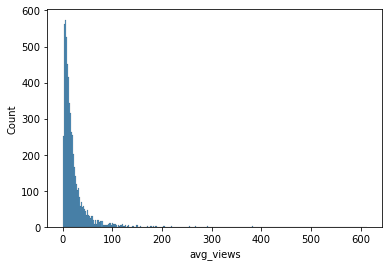

In [6]:
from seaborn import histplot
histplot(df_new['avg_views'])

In [3]:
class MyDataset(torch.utils.data.Dataset):
    def __init__(self, X, y=None, transform=None):
#         self.const_dir = 'im_data/image_'
        self.transform = transform
        self.num_elem = len(X)
        self.X = X
        self.target = y

    def __getitem__(self, idx):
#         im_name = self.const_dir + str(idx).zfill(4) + '.jpg'
        image = torchvision.io.read_image(self.X.iloc[idx]) / 255

        if (self.transform is not None):
            image = self.transform(image)
        if (self.target is not None):
            # return image, torch.Tensor(self.X.iloc[idx][['Cardiomegaly', 'Edema', 'Consolidation', 'Atelectasis', 'Pleural Effusion']])
            return image, self.target.iloc[idx]
        return image
    
    def __len__(self):
        return self.num_elem

In [5]:
df_new.shape

(5811, 15)

In [11]:
train_dataset = MyDataset(df_new['im_dir'], df_new['Repair_types_id'], transform=None)

In [13]:
drop_list = []
for i in range(len(train_dataset)):
    try:
        train_dataset[i]
    except:
        drop_list += [i]

/Users/anna/opt/anaconda3/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


In [22]:
df_new = df_new.drop(drop_list)